In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
# Importing the dataset
df = pd.read_csv(r'C:\Users\Akhila Rachuri\Documents\DIC Phase 2\E-Commerce Dataset After Phase1.csv')

In [3]:
df.shape

(5628, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5628 entries, 0 to 5627
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5628 non-null   int64  
 1   Tenure                       5628 non-null   int64  
 2   PreferredLoginDevice         5628 non-null   object 
 3   CityTier                     5628 non-null   int64  
 4   WarehouseToHome              5628 non-null   float64
 5   PreferredPaymentMode         5628 non-null   object 
 6   Gender                       5628 non-null   int64  
 7   HourSpendOnApp               5628 non-null   float64
 8   NumberOfDeviceRegistered     5628 non-null   int64  
 9   PreferedOrderCategory        5628 non-null   object 
 10  SatisfactionScore            5628 non-null   int64  
 11  MaritalStatus                5628 non-null   object 
 12  NumberOfAddress              5628 non-null   int64  
 13  Complain          

In [5]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCategory,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4,Mobile,3,6.0,Debit Card,1,3.0,3,Laptop Accessory,2,Single,9,1,11.0,1,1,5,160
1,1,10,Phone,1,8.0,UPI,0,3.0,4,Mobile,3,Single,7,1,15.0,0,1,0,121
2,1,10,Phone,1,30.0,Debit Card,0,2.0,4,Mobile,3,Single,6,1,14.0,0,1,3,120
3,1,0,Phone,3,15.0,Debit Card,0,2.0,4,Laptop Accessory,5,Single,8,0,23.0,0,1,3,134
4,1,0,Phone,1,12.0,Credit Card,0,3.0,3,Mobile,5,Single,3,0,11.0,1,1,3,130


# Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# Assuming 'df' is DataFrame with multi-class variables
# Select the columns with object data-type variables
object_columns = ['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCategory','MaritalStatus']
# Applying Label Encoding to each categorical column
for iter in range(len(object_columns)):
    value = object_columns[iter]
    df[value] = encoder.fit_transform(df[value])

In [7]:
df.info()
# It is clear that each unique label in categorical columns are encoded into unique integers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5628 entries, 0 to 5627
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5628 non-null   int64  
 1   Tenure                       5628 non-null   int64  
 2   PreferredLoginDevice         5628 non-null   int32  
 3   CityTier                     5628 non-null   int64  
 4   WarehouseToHome              5628 non-null   float64
 5   PreferredPaymentMode         5628 non-null   int32  
 6   Gender                       5628 non-null   int64  
 7   HourSpendOnApp               5628 non-null   float64
 8   NumberOfDeviceRegistered     5628 non-null   int64  
 9   PreferedOrderCategory        5628 non-null   int32  
 10  SatisfactionScore            5628 non-null   int64  
 11  MaritalStatus                5628 non-null   int32  
 12  NumberOfAddress              5628 non-null   int64  
 13  Complain          

# Splitting the dataset into training and testing

In [8]:
from sklearn.model_selection import train_test_split
#splits the dataset in ratio 80-20
independent_variables = df.drop(columns=['Churn'])
dependent_variable = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(independent_variables,dependent_variable, test_size=0.2, random_state=42)

# Scaling

In [9]:
from sklearn import preprocessing
import numpy as np
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Initializes the empty list

- Used for final step analysis based on all algorithms

In [10]:
algorithms = []
# List of accuracies
accuracies = []

# 1. Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# importing the logistic Regression from sklearns library
model_log = LogisticRegression(class_weight='balanced')
model_log.fit(X_train, y_train)
log_preds = model_log.predict(X_test)

In [12]:
model_log_accuracy = accuracy_score(y_test, log_preds)
precision = precision_score(y_test, log_preds)
recall = recall_score(y_test, log_preds)
f1 = f1_score(y_test, log_preds)
#Prints the model performance metrics
print("Performance Metrics for Logistic Regression")
print('Accuracy:', round(model_log_accuracy * 100,2), '%')
print('Precision: ',round(precision,2))
print('Recall: ',round(recall,2))
print('F1 Score: ',round(f1,2))
algorithms.append('Logistic Regression')
accuracies.append(79.93)

Performance Metrics for Logistic Regression
Accuracy: 79.93 %
Precision:  0.42
Recall:  0.78
F1 Score:  0.55


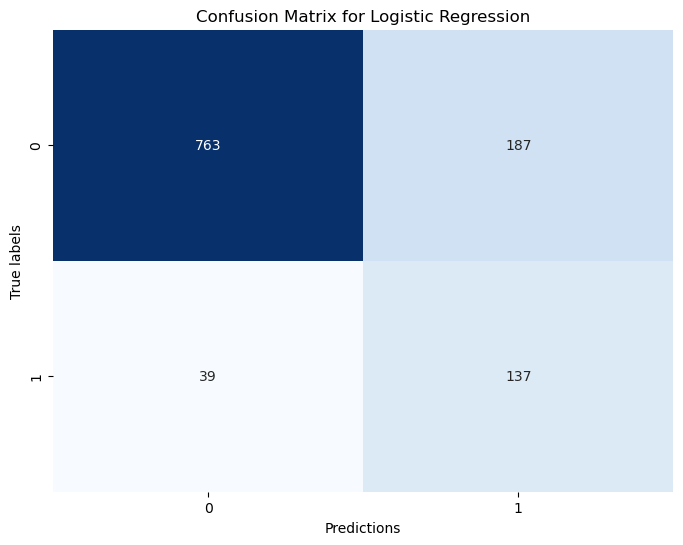

In [13]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))
# generating the confusion matrix 
sns.heatmap(confusion_matrix(y_test, log_preds), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predictions')
plt.ylabel('True labels')
plt.show()

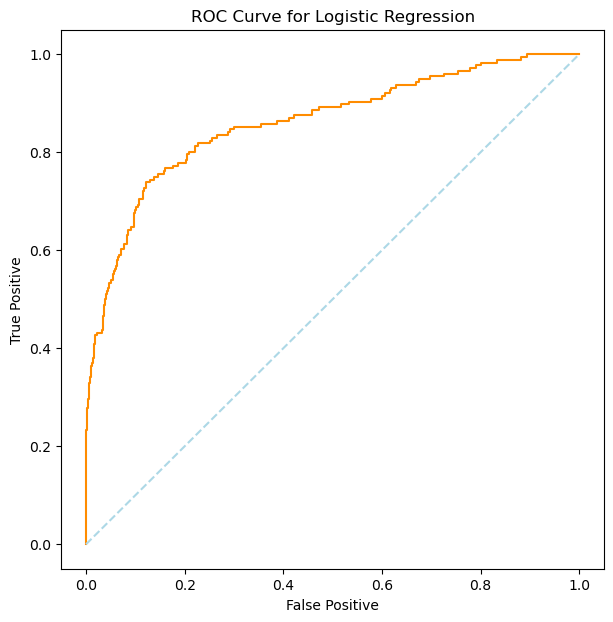

Area Under the ROC curve for logistic regression 0.86


In [14]:
from sklearn.metrics import roc_curve, auc
#gets the predicted probabilities for positive class
log_scores = model_log.predict_proba(X_test)[:, 1]
fpr,tpr, thresholds = roc_curve(y_test, log_scores)
# calculates the false positive rate, true positive rate and thresholds
plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='lightblue', linestyle='--')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve for Logistic Regression')
plt.show()
#Calculating the area under the roc curve to indicate the performance
log_auc = auc(fpr,tpr)
print("Area Under the ROC curve for logistic regression",round(log_auc,2))

# 2. Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
# Training the Naive Bayes model
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)
NB_preds = model_NB.predict(X_test)

In [16]:
#Calculating the accuracy for Naive Bayes Model
model_NB_accuracy = accuracy_score(y_test, NB_preds)
precision = precision_score(y_test, NB_preds)
recall = recall_score(y_test, NB_preds)
f1 = f1_score(y_test, NB_preds)
#Prints the model performance metrics
print("Performance Metrics for Naive Bayes")
print('Accuracy:', round(model_NB_accuracy * 100,2), '%')
print('Precision: ',round(precision,2))
print('Recall: ',round(recall,2))
print('F1 Score: ',round(f1,2))
algorithms.append('Naive Bayes')
accuracies.append(86.94)

Performance Metrics for Naive Bayes
Accuracy: 86.94 %
Precision:  0.58
Recall:  0.57
F1 Score:  0.58


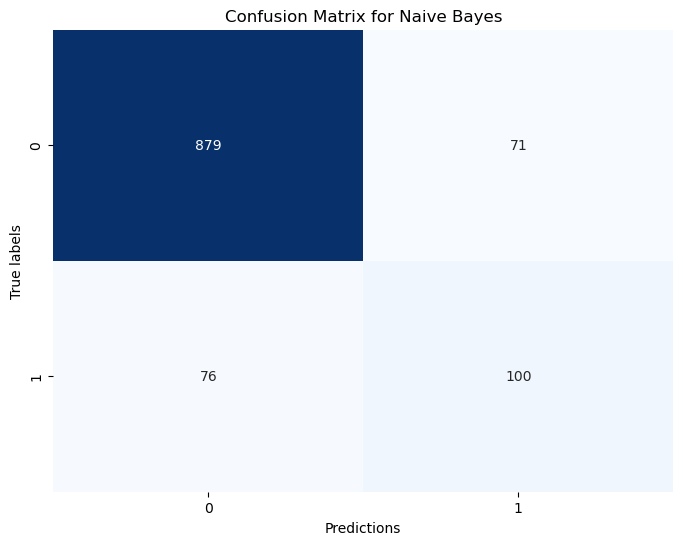

In [17]:
from sklearn.metrics import confusion_matrix
# generating the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, NB_preds), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predictions')
plt.ylabel('True labels')
plt.show()

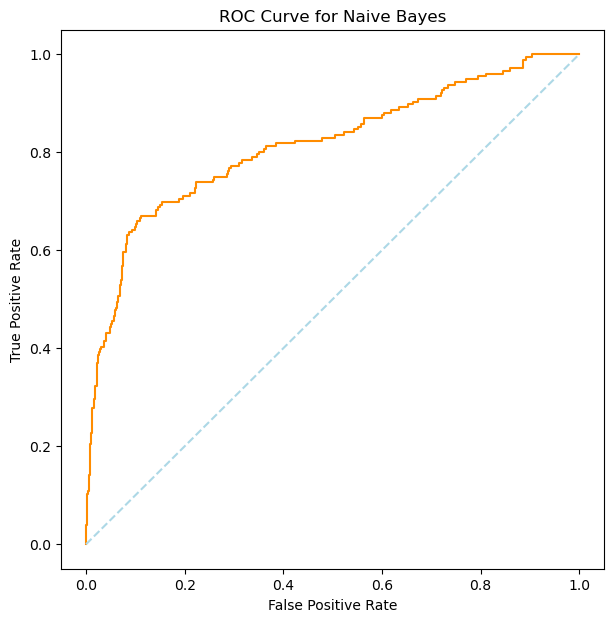

Area Under the ROC curve for Naive Bayes 0.81


In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
#gets the predicted probabilities for positive class
NB_scores = model_NB.predict_proba(X_test)[:, 1]
# calculates the false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, NB_scores)
# Plotting the ROC Curve for Naive Bayes
plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='lightblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.show()
#Calculating the area under the roc curve to indicate the performance
NB_auc = auc(fpr,tpr)
print("Area Under the ROC curve for Naive Bayes",round(NB_auc,2))

# 3. Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(random_state=42)
# Training the Decision Tree model
model_tree.fit(X_train, y_train)
tree_preds = model_tree.predict(X_test)

In [20]:
# Calculating the accuracy
model_tree_accuracy = accuracy_score(y_test, tree_preds)
precision = precision_score(y_test, tree_preds)
recall = recall_score(y_test, tree_preds)
f1 = f1_score(y_test, tree_preds)
#Prints the model performance metrics
print("Performance Metrics for Decision Tree")
print('Accuracy: ',round(model_tree_accuracy * 100,2),'%')
print('Precision: ',round(precision,2))
print('Recall: ',round(recall,2))
print('F1 Score: ',round(f1,2))
algorithms.append('Decision Tree')
accuracies.append(94.32)

Performance Metrics for Decision Tree
Accuracy:  94.32 %
Precision:  0.8
Recall:  0.85
F1 Score:  0.82


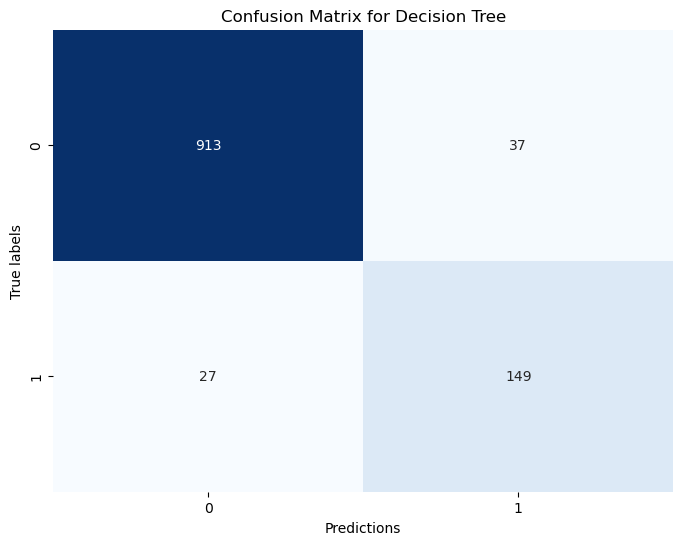

In [21]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))
# Generating the Confusion Matrix
sns.heatmap(confusion_matrix(y_test, tree_preds), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predictions')
plt.ylabel('True labels')
plt.show()

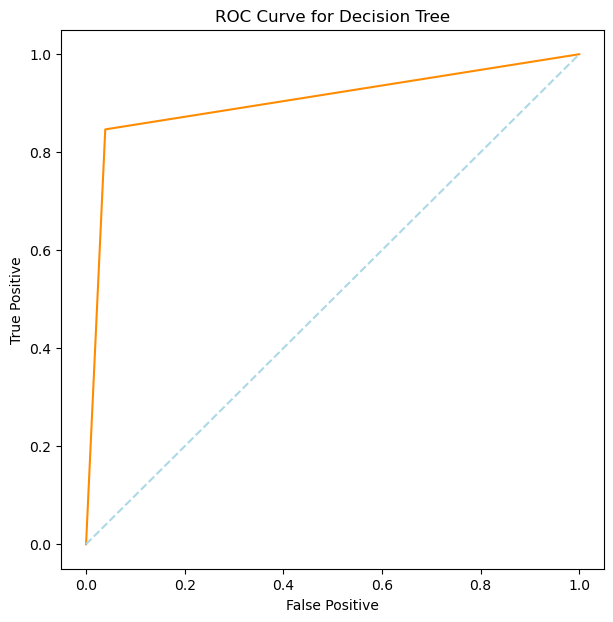

Area Under the ROC curve for Decision Tree 0.904


In [22]:
from sklearn.metrics import roc_curve
#gets the predicted probabilities for positive class
tree_scores = model_tree.predict_proba(X_test)[:, 1]
# calculates the false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, tree_scores)
# Plotting the ROC Curve for Decision Tree
plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='lightblue', linestyle='--')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve for Decision Tree')
plt.show()
#Calculating the area under the roc curve to indicate the performance
tree_auc = auc(fpr,tpr)
print("Area Under the ROC curve for Decision Tree",round(tree_auc,3))

# 4. Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model_rf = RandomForestClassifier(random_state=42)
# Training the Random Forest model
model_rf.fit(X_train, y_train)
rf_preds = model_rf.predict(X_test)

In [24]:
# Calculating the accuracy for Random Forest Model
model_rf_accuracy = accuracy_score(y_test, rf_preds)
precision = precision_score(y_test, rf_preds)
recall = recall_score(y_test, rf_preds)
f1 = f1_score(y_test, rf_preds)
#Prints the model performance metrics
print("Performance Metrics for Random Forest")
print('Accuracy:', round(model_rf_accuracy * 100,2), '%')
print('Precision: ',round(precision,2))
print('Recall: ',round(recall,2))
print('F1 Score: ',round(f1,2))
algorithms.append('Random Forest')
accuracies.append(97.78)

Performance Metrics for Random Forest
Accuracy: 97.78 %
Precision:  0.99
Recall:  0.86
F1 Score:  0.92


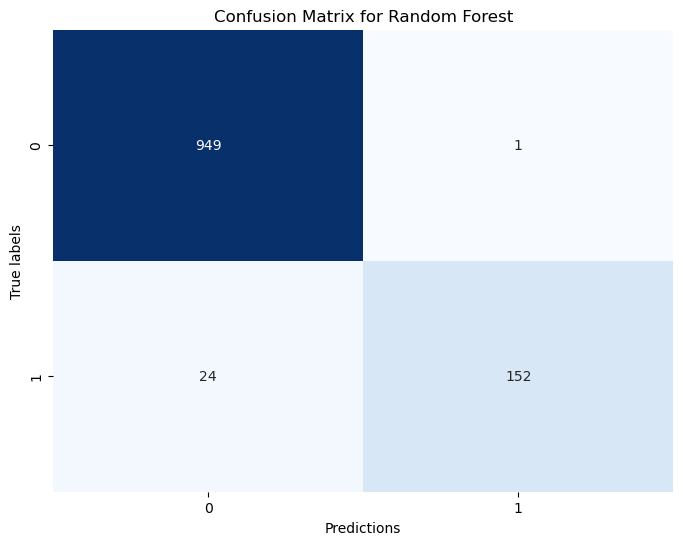

In [25]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))
#Generating the Confusion Matrix
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predictions')
plt.ylabel('True labels')
plt.show()

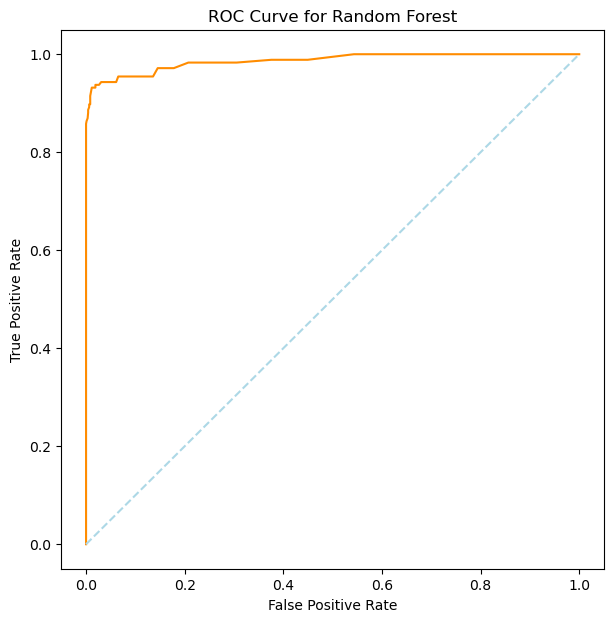

Area Under the ROC curve for Random Forest 0.986


In [26]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
#gets the predicted probabilities for positive class
rf_scores = model_rf.predict_proba(X_test)[:, 1]
# calculates the false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf_scores)
# Plotting the ROC Curve for Random Forest
plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='lightblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.show()
#Calculating the area under the roc curve to indicate the performance
rf_auc = auc(fpr,tpr)
print("Area Under the ROC curve for Random Forest",round(rf_auc,3))

# 5. K-Nearest Neighbors

In [27]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k = 5 # Assigning k as 5 
model_knn = KNeighborsClassifier(n_neighbors=k)
model_knn.fit(X_train, y_train)
knn_preds = model_knn.predict(X_test)

In [28]:
model_knn_accuracy = accuracy_score(y_test, knn_preds)
precision = precision_score(y_test, knn_preds)
recall = recall_score(y_test, knn_preds)
f1 = f1_score(y_test, knn_preds)
#Prints the model performance metrics
print("Performance Metrics for K-Nearest Neighbors")
print('Accuracy:', round(model_knn_accuracy * 100,2), '%')
print('Precision: ',round(precision,2))
print('Recall: ',round(recall,2))
print('F1 Score: ',round(f1,2))
algorithms.append('KNN')
accuracies.append(92.72)

Performance Metrics for K-Nearest Neighbors
Accuracy: 92.72 %
Precision:  0.89
Recall:  0.61
F1 Score:  0.72


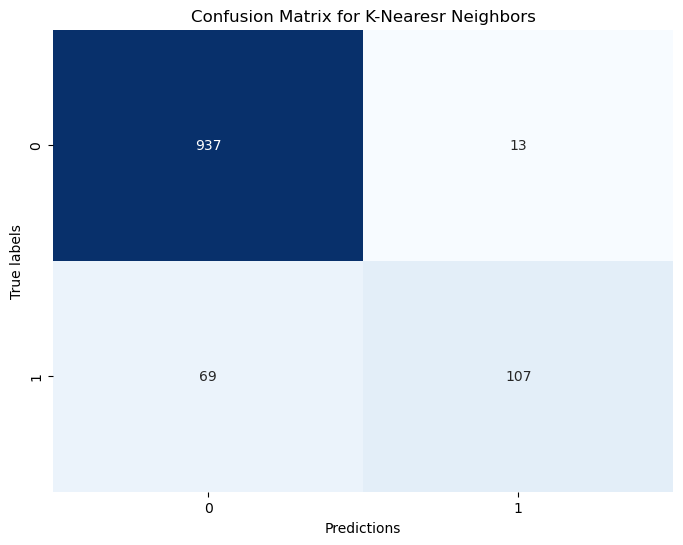

In [29]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))
#Generating the Confusion Matrix
sns.heatmap(confusion_matrix(y_test, knn_preds), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for K-Nearesr Neighbors')
plt.xlabel('Predictions')
plt.ylabel('True labels')
plt.show()

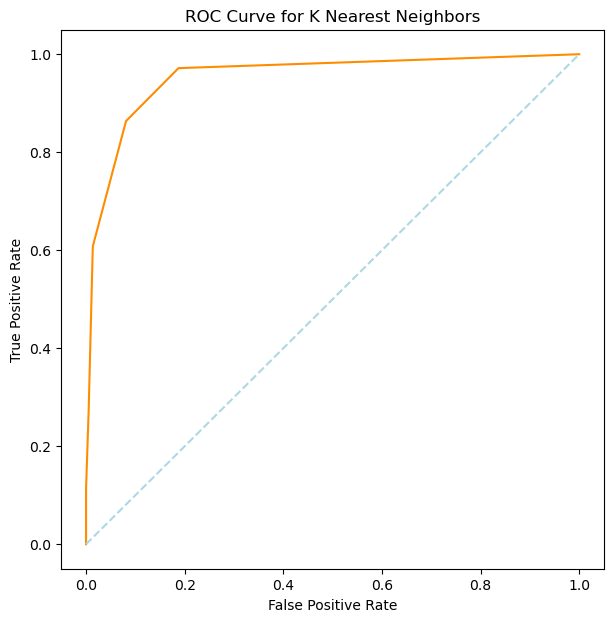

Area Under the ROC curve for K Nearest Neighbors 0.953


In [30]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
#gets the predicted probabilities for positive class
knn_scores = model_knn.predict_proba(X_test)[:, 1]
# calculates the false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, knn_scores)
# Plotting the ROC Curve for K Nearest Neighbor
plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='lightblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for K Nearest Neighbors')
plt.show()
#Calculating the area under the roc curve to indicate the performance
knn_auc = auc(fpr,tpr)
print("Area Under the ROC curve for K Nearest Neighbors",round(knn_auc,3))

# 6. Support Vector Machine

In [31]:
from sklearn.svm import SVC
model_svm = SVC(kernel='rbf',probability=True) 
# Train the SVM model
model_svm.fit(X_train, y_train)
svm_preds = model_svm.predict(X_test)

In [32]:
model_svm_accuracy = accuracy_score(y_test, svm_preds)
precision = precision_score(y_test, svm_preds)
recall = recall_score(y_test, svm_preds)
f1 = f1_score(y_test, svm_preds)
#Prints the model performance metrics
print("Performance Metrics for Support Vector Machine")
print('Accuracy:', round(model_svm_accuracy * 100,2), '%')
print('Precision: ',round(precision,2))
print('Recall: ',round(recall,2))
print('F1 Score: ',round(f1,2))
algorithms.append('SVM')
accuracies.append(92.36)

Performance Metrics for Support Vector Machine
Accuracy: 92.36 %
Precision:  0.88
Recall:  0.59
F1 Score:  0.71


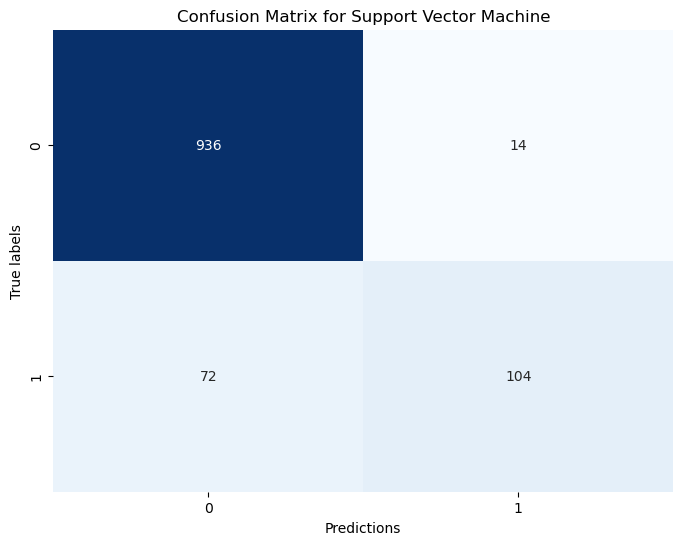

In [33]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))
#Generating the Confusion Matrix
sns.heatmap(confusion_matrix(y_test, svm_preds), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Support Vector Machine')
plt.xlabel('Predictions')
plt.ylabel('True labels')
plt.show()

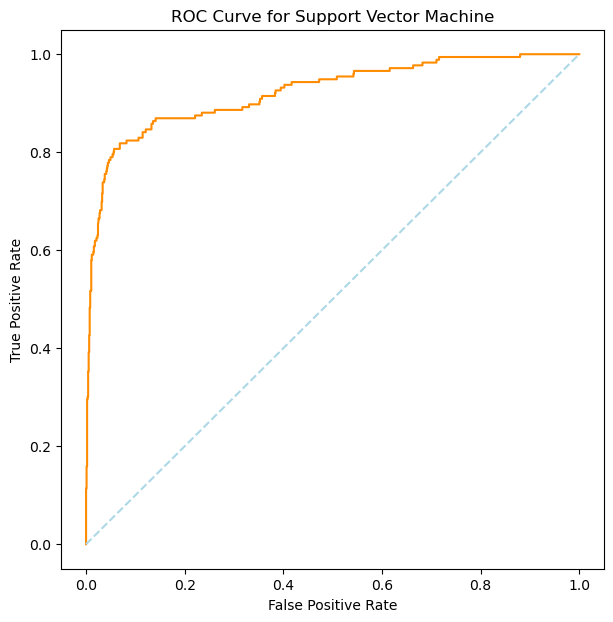

Area Under the ROC curve for Support Vector Machine 0.923


In [34]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
#gets the predicted probabilities for positive class
svm_scores = model_svm.predict_proba(X_test)[:, 1]
# calculates the false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, svm_scores)
# Plotting the ROC Curve for Support Vector Machine
plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='lightblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Support Vector Machine')
plt.show()
#Calculating the area under the roc curve to indicate the performance
svm_auc = auc(fpr,tpr)
print("Area Under the ROC curve for Support Vector Machine",round(svm_auc,3))

# 7. Quadratic Discriminant Analysis

In [35]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model_qda = QuadraticDiscriminantAnalysis()
# Training the QDA model
model_qda.fit(X_train, y_train)
qda_preds = model_qda.predict(X_test)

In [36]:
model_qda_accuracy = accuracy_score(y_test, qda_preds)
precision = precision_score(y_test, qda_preds)
recall = recall_score(y_test, qda_preds)
f1 = f1_score(y_test, qda_preds)
#Prints the model performance metrics
print("Performance Metrics for Quadratic Discriminant Analysis")
print('Accuracy:', round(model_qda_accuracy * 100,2), '%')
print('Precision: ',round(precision,2))
print('Recall: ',round(recall,2))
print('F1 Score: ',round(f1,2))
algorithms.append('QDA')
accuracies.append(86.77)

Performance Metrics for Quadratic Discriminant Analysis
Accuracy: 86.77 %
Precision:  0.57
Recall:  0.61
F1 Score:  0.59


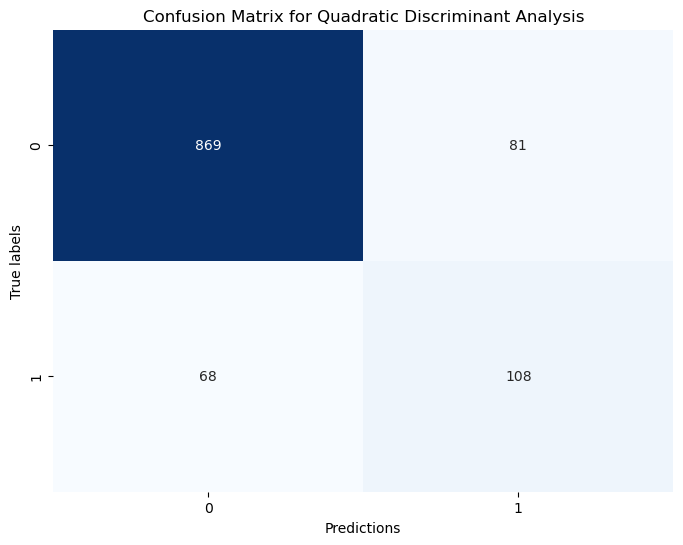

In [37]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))
#Generating the Confusion Matrix
sns.heatmap(confusion_matrix(y_test, qda_preds), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Quadratic Discriminant Analysis')
plt.xlabel('Predictions')
plt.ylabel('True labels')
plt.show()

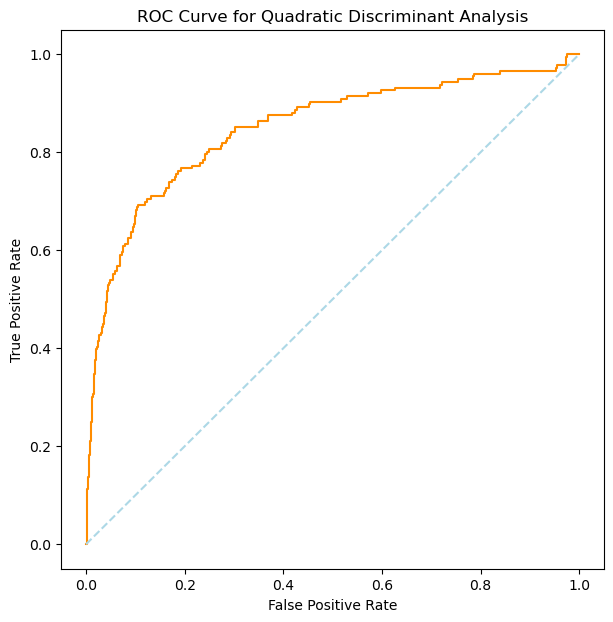

Area Under the ROC curve for Quadratic Discriminant Analysis 0.848


In [38]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
#gets the predicted probabilities for positive class
qda_scores = model_qda.predict_proba(X_test)[:, 1]
# calculates the false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, qda_scores)
# Plotting the ROC Curve for Support Vector Machine
plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='lightblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Quadratic Discriminant Analysis')
plt.show()
#Calculating the area under the roc curve to indicate the performance
qda_auc = auc(fpr,tpr)
print("Area Under the ROC curve for Quadratic Discriminant Analysis",round(qda_auc,3))

# Accuracy Analysis for Machine Learning models

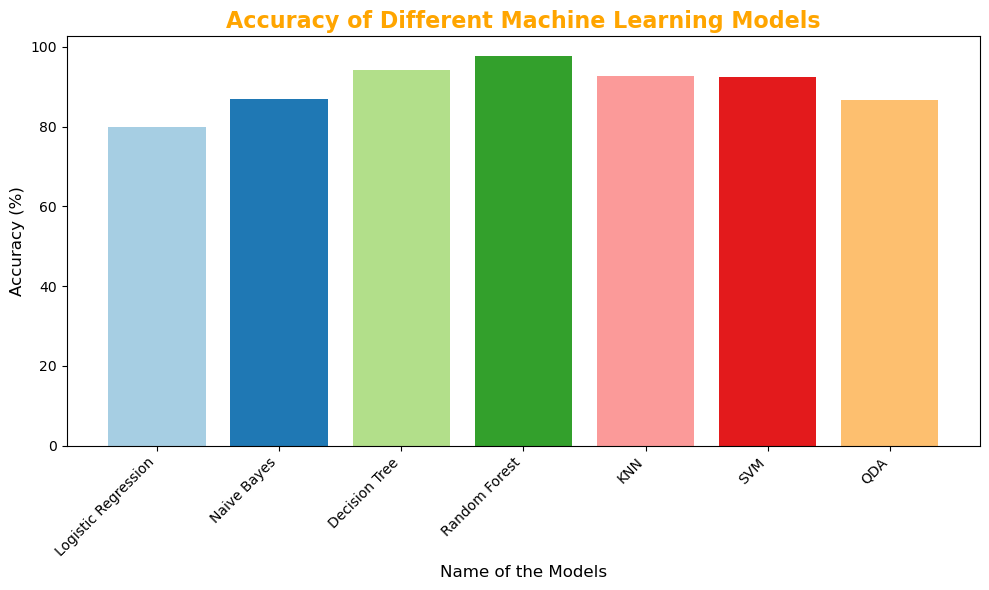

In [39]:
import matplotlib.pyplot as plt
colors = plt.cm.Paired(range(len(algorithms)))
# Creates labels with both model names and accuracies
labs = [f'{model}\n{acc}%' for model, acc in zip(algorithms, accuracies)]
# Creates bar plot
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=colors)
# Adds labels and title
plt.xlabel('Name of the Models', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Accuracy of Different Machine Learning Models', fontsize=16, fontweight='bold', color='orange')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# plot
plt.show()

# Conclusion

- Random Forest and SVM models demonstrate superior performance with accuracy levels exceeding 90%, making them the most reliable for the data evaluated.

- KNN and QDA also show high accuracy, suggesting their potential effectiveness as alternatives depending on specific use-case requirements.

- Logistic Regression, Naïve Bayes, and Decision Tree models have lower accuracy in comparison, but could be favored for their simplicity and computational speed.
